In [1]:
import rioxarray as rxr
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import interpolate
import random
import datetime
import seaborn as sns

In [2]:
goes_root = '/home/jonstar/scratch.gcurbanheat/temporary_GOES_data'
landsat_root = '/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data'

## Data Visualization

In [48]:
dsL = rxr.open_rasterio(landsat_root+'/DMV/Landsat_Sentinel_image_DMV_202201081546.tif')
#dsL = rxr.open_rasterio(landsat_root+'/Atlanta/Landsat_Sentinel_image_Atlanta_202205121612.tif')
dsL

<xarray.DataArray (band: 13, y: 3001, x: 3000)> Size: 936MB
[117039000 values with dtype=float64]
Coordinates:
  * band         (band) int64 104B 1 2 3 4 5 6 7 8 9 10 11 12 13
  * x            (x) float64 24kB 2.92e+05 2.92e+05 ... 3.819e+05 3.82e+05
  * y            (y) float64 24kB 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'S...

In [49]:
dsL = dsL.reindex(y=dsL.y[::-1])
dsL

<xarray.DataArray (band: 13, y: 3001, x: 3000)> Size: 936MB
[117039000 values with dtype=float64]
Coordinates:
  * band         (band) int64 104B 1 2 3 4 5 6 7 8 9 10 11 12 13
  * x            (x) float64 24kB 2.92e+05 2.92e+05 ... 3.819e+05 3.82e+05
  * y            (y) float64 24kB 4.282e+06 4.282e+06 ... 4.372e+06 4.372e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'S...

Text(0.5, 0.98, 'Visualization of Landsat Bands, DMV 202201081546')

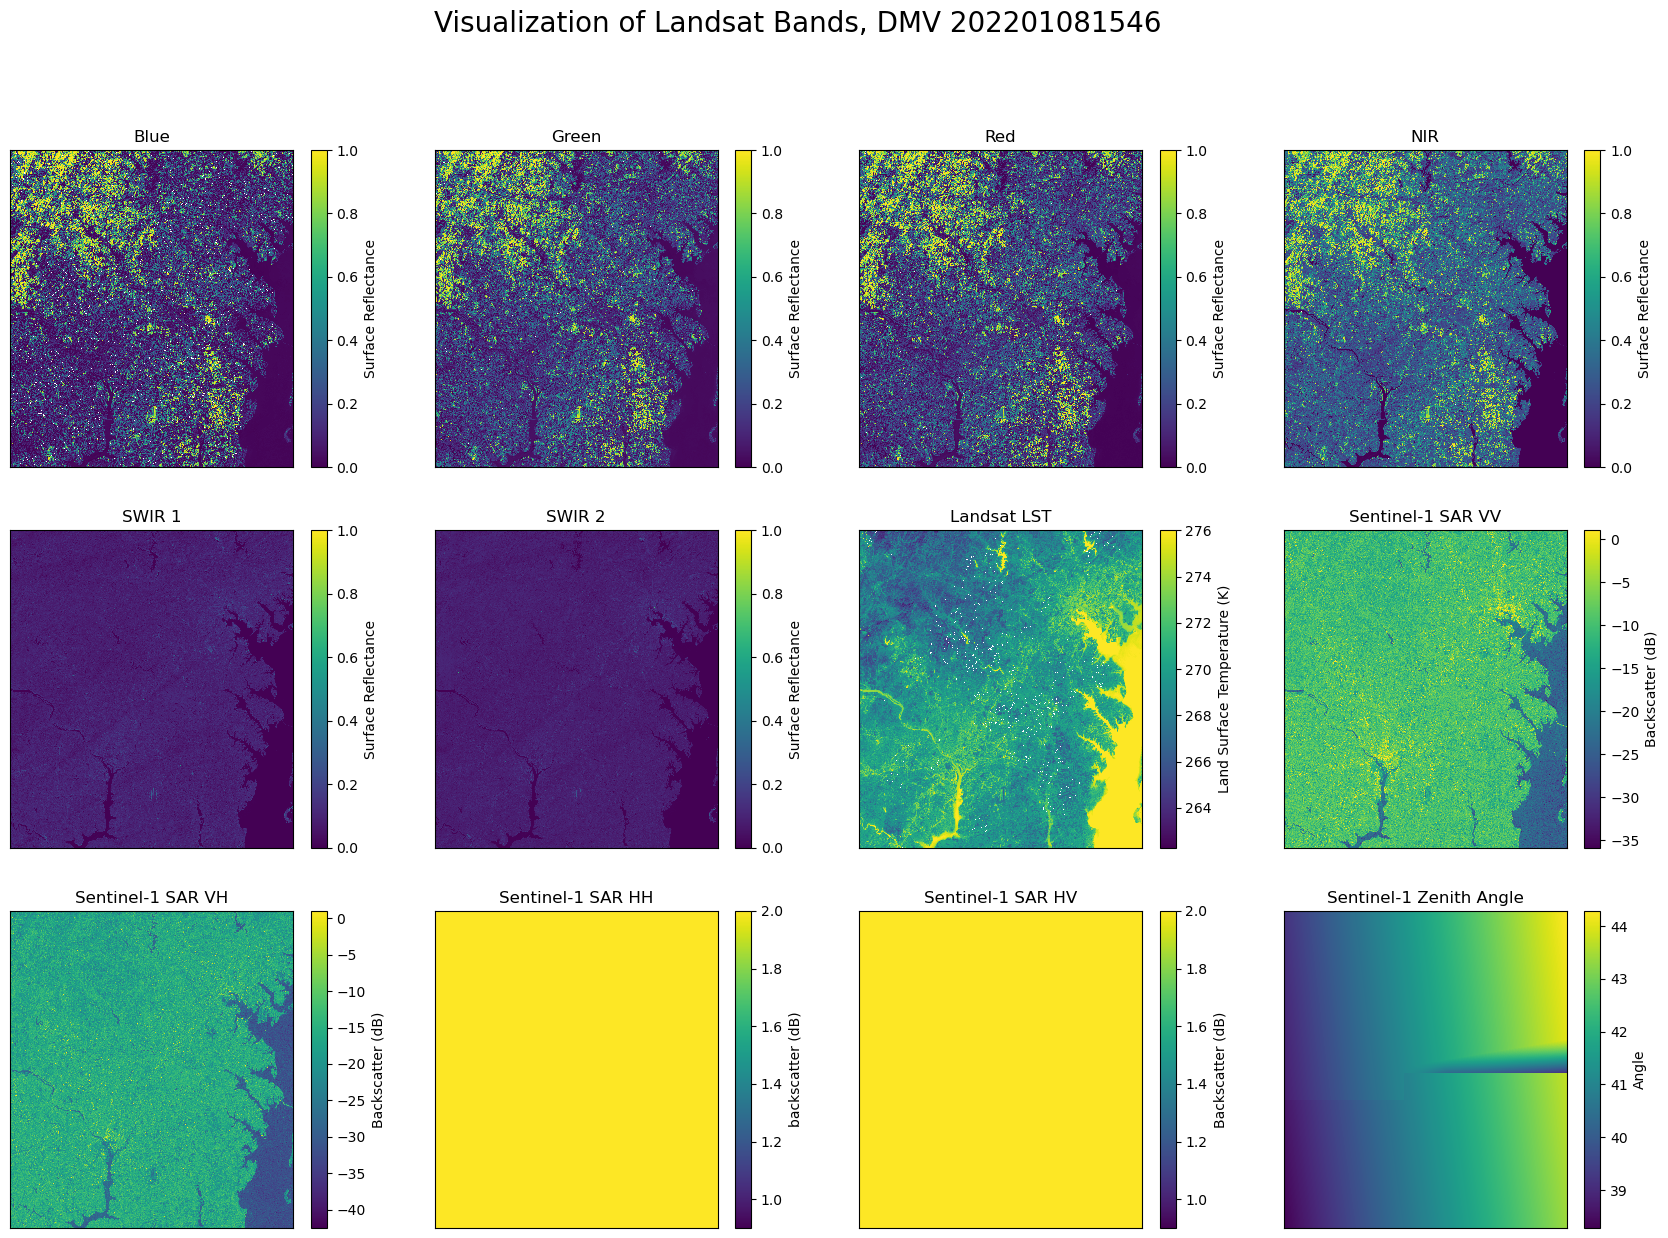

In [50]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(21, 14)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

cb = axs[0,0].pcolormesh(dsL[0], vmin=0, vmax=1)
fig.colorbar(cb, ax=axs[0,0], label='Surface Reflectance', orientation='vertical')
axs[0,0].set_title('Blue')
cb = axs[0,1].pcolormesh(dsL[1], vmin=0, vmax=1)
fig.colorbar(cb, ax=axs[0,1], label='Surface Reflectance', orientation='vertical')
axs[0,1].set_title('Green')
cb = axs[0,2].pcolormesh(dsL[2], vmin=0, vmax=1)
fig.colorbar(cb, ax=axs[0,2], label='Surface Reflectance', orientation='vertical')
axs[0,2].set_title('Red')
cb = axs[0,3].pcolormesh(dsL[3], vmin=0, vmax=1)
fig.colorbar(cb, ax=axs[0,3], label='Surface Reflectance', orientation='vertical')
axs[0,3].set_title('NIR')
cb = axs[1,0].pcolormesh(dsL[4], vmin=0, vmax=1)
fig.colorbar(cb, ax=axs[1,0], label='Surface Reflectance', orientation='vertical')
axs[1,0].set_title('SWIR 1')
cb = axs[1,1].pcolormesh(dsL[5], vmin=0, vmax=1)
fig.colorbar(cb, ax=axs[1,1], label='Surface Reflectance', orientation='vertical')
axs[1,1].set_title('SWIR 2')
cb = axs[1,2].pcolormesh(dsL[6], vmax=276)
fig.colorbar(cb, ax=axs[1,2], label='Land Surface Temperature (K)', orientation='vertical')
axs[1,2].set_title('Landsat LST')
cb = axs[1,3].pcolormesh(dsL[8], vmax=1)
fig.colorbar(cb, ax=axs[1,3], label='Backscatter (dB)', orientation='vertical')
axs[1,3].set_title('Sentinel-1 SAR VV')
cb = axs[2,0].pcolormesh(dsL[9], vmax=1)
fig.colorbar(cb, ax=axs[2,0], label='Backscatter (dB)', orientation='vertical')
axs[2,0].set_title('Sentinel-1 SAR VH')
cb = axs[2,1].pcolormesh(dsL[10], vmax=1)
fig.colorbar(cb, ax=axs[2,1], label='backscatter (dB)', orientation='vertical')
axs[2,1].set_title('Sentinel-1 SAR HH')
cb = axs[2,2].pcolormesh(dsL[11], vmax=1)
fig.colorbar(cb, ax=axs[2,2], label='Backscatter (dB)', orientation='vertical')
axs[2,2].set_title('Sentinel-1 SAR HV')
cb = axs[2,3].pcolormesh(dsL[12])
fig.colorbar(cb, ax=axs[2,3], label='Angle', orientation='vertical')
axs[2,3].set_title('Sentinel-1 Zenith Angle')

fig.suptitle(f'Visualization of Landsat Bands, DMV 202201081546', fontsize=20)

In [51]:
# Load closest GOES image to the Landsat image
dsG = rxr.open_rasterio(goes_root+'/DMV/GOES_image_202201081550.tif')
dsG

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


<xarray.DataArray (band: 4, y: 45, x: 45)> Size: 65kB
[8100 values with dtype=float64]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 360B 2.93e+05 2.95e+05 ... 3.79e+05 3.81e+05
  * y            (y) float64 360B 4.371e+06 4.369e+06 ... 4.285e+06 4.283e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0

In [52]:
dsG = dsG.reindex(y=dsG.y[::-1])
dsG

<xarray.DataArray (band: 4, y: 45, x: 45)> Size: 65kB
[8100 values with dtype=float64]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 360B 2.93e+05 2.95e+05 ... 3.79e+05 3.81e+05
  * y            (y) float64 360B 4.283e+06 4.285e+06 ... 4.369e+06 4.371e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0

Text(0.5, 0.98, 'Visualization of GOES Bands, DMV 202201081550')

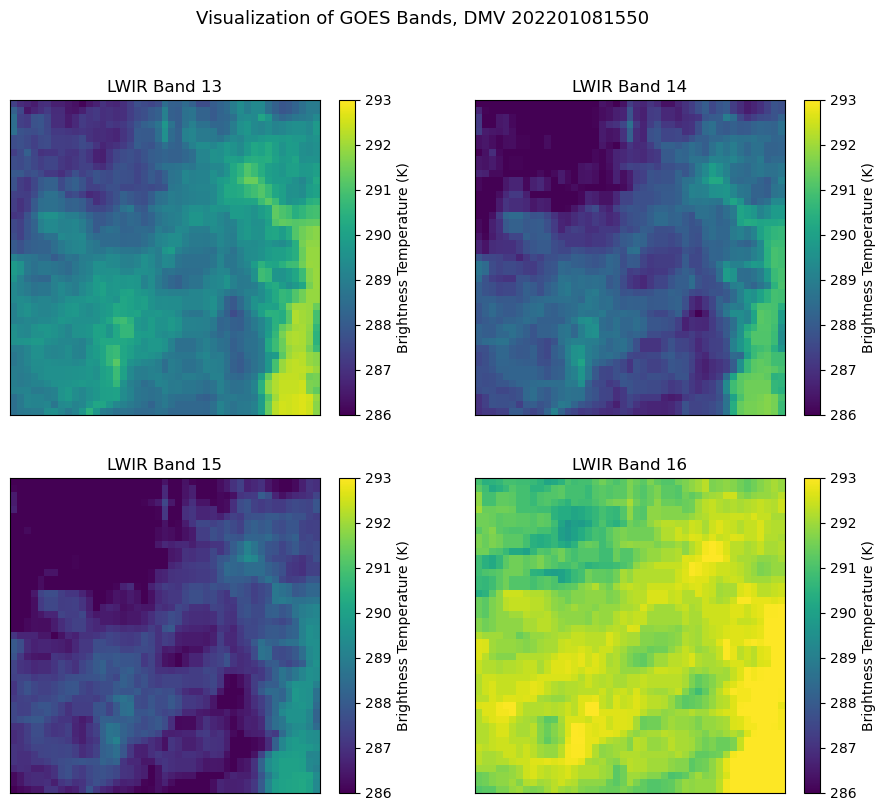

In [53]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(11, 9)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

cb = axs[0,0].pcolormesh(dsG[0], vmin=286, vmax=293)
fig.colorbar(cb, ax=axs[0,0], label='Brightness Temperature (K)', orientation='vertical')
axs[0,0].set_title('LWIR Band 13')
cb = axs[0,1].pcolormesh(dsG[1], vmin=286, vmax=293)
fig.colorbar(cb, ax=axs[0,1], label='Brightness Temperature (K)', orientation='vertical')
axs[0,1].set_title('LWIR Band 14')
cb = axs[1,0].pcolormesh(dsG[2], vmin=286, vmax=293)
fig.colorbar(cb, ax=axs[1,0], label='Brightness Temperature (K)', orientation='vertical')
axs[1,0].set_title('LWIR Band 15')
cb = axs[1,1].pcolormesh(dsG[3], vmin=286, vmax=293)
fig.colorbar(cb, ax=axs[1,1], label='Brightness Temperature (K)', orientation='vertical')
axs[1,1].set_title('LWIR Band 16')

fig.suptitle(f'Visualization of GOES Bands, DMV 202201081550', fontsize=13)

## Train Test Split

In [3]:
cities = ['DMV', 'NYC', 'Atlanta']

In [4]:
nLandsat = []

for city in cities:
    nLandsat.append(len(os.listdir(landsat_root+f'/{city}')))

In [5]:
train_index_list = []
test_index_list = []
#val_index_list = []
np.random.seed(53)

for n in nLandsat:
    #n = n/2 # Small number of files to start with
    nTrain = round(n*0.7)
    #nVal = round(nTrain*0.2)
    nums = np.arange(round(n))
    train_indexes = np.random.choice(nums, nTrain, replace=False)
    test_indexes = np.setdiff1d(nums, train_indexes)
    #val_indexes = np.random.choice(train_indexes, nVal, replace=False)
    #train_indexes = np.setdiff1d(train_indexes, val_indexes)
    train_index_list.append(train_indexes)
    test_index_list.append(test_indexes)
    #val_index_list.append(val_indexes)

In [6]:
train_indices_cities = dict(zip(cities, train_index_list))
train_indices_cities

{'DMV': array([ 0, 19, 18, 13, 15,  8, 14,  1,  7,  6,  3,  4, 11, 17, 10,  2]),
 'NYC': array([17,  4,  1, 13,  8,  7, 16,  9, 19,  5,  3, 15,  2, 10]),
 'Atlanta': array([ 7,  5,  3, 14, 10, 15,  9,  0,  2, 11,  1, 16])}

In [7]:
test_indices_cities = dict(zip(cities, test_index_list))
test_indices_cities

{'DMV': array([ 5,  9, 12, 16, 20, 21, 22]),
 'NYC': array([ 0,  6, 11, 12, 14, 18]),
 'Atlanta': array([ 4,  6,  8, 12, 13])}

In [9]:
def interpolate_GOES(ds, GOES_coords, coords):
    band13 = interpolate.griddata(points=GOES_coords, values=ds[0].values.reshape(-1), xi=coords, method='nearest').reshape((3000, 3000))
    band14 = interpolate.griddata(points=GOES_coords, values=ds[1].values.reshape(-1), xi=coords, method='nearest').reshape((3000, 3000))
    band15 = interpolate.griddata(points=GOES_coords, values=ds[2].values.reshape(-1), xi=coords, method='nearest').reshape((3000, 3000))
    band16 = interpolate.griddata(points=GOES_coords, values=ds[3].values.reshape(-1), xi=coords, method='nearest').reshape((3000, 3000))
    ds_interpolated = xr.DataArray(np.stack([band13, band14, band15, band16])).rename({'dim_0':'band', 'dim_1':'y', 'dim_2':'x'})
    return ds_interpolated

In [29]:
def file_processing(file, city):
    datetime = file[-16:-4]
    GOES_datetime = round(int(datetime)/10)*10
    if GOES_datetime <= 202207282150:
        subdir = ''
    else:
        subdir = '2'
    GOES_file = goes_root+'/'+city+'/GOES_image_'+str(GOES_datetime)+'.tif'
    
    dsG = rxr.open_rasterio(GOES_file)
    ds = rxr.open_rasterio(file)[:,:3000,:3000]

    x, y = np.meshgrid(dsG.coords['x'].values, dsG.coords['y'].values)
    GOES_coords = np.stack((x, y), axis=2).reshape((-1,2))
    x, y = np.meshgrid(ds.coords['x'].values, ds.coords['y'].values)
    coords = np.stack((x, y), axis=2).reshape((-1,2))
    # Interpolate GOES temperatures onto the Landsat grid
    ds_interpolated = interpolate_GOES(dsG, GOES_coords, coords).to_dataset('band')

    ds = ds.to_dataset('band').rename(dict(zip(np.arange(1, len(ds.long_name)+1), ds.long_name)))
    del ds.attrs['long_name']
    
    for band in ['VV', 'VH', 'HH', 'HV']:
        if band in ds:
            ds[band] = (('y', 'x'), np.where(ds[band] > 1, 0, ds[band]))

    if 'HH' in ds:
        ds = ds.assign(single_pol_SAR=(('y', 'x'), ds['VV'].data + ds['HH'].data))
        #ds['single_pol_SAR'] = (('y', 'x'), ds['VV'].data + ds['HH'].data)
    else:
        ds = ds.assign(single_pol_SAR=(('y', 'x'), ds['VV'].data))
    if 'HV' in ds:
        #ds['dual_pol_SAR'] = (('y', 'x'), ds['VH'].data + ds['HV'].data)
        ds = ds.assign(dual_pol_SAR=(('y', 'x'), ds['VH'].data + ds['HV'].data))
    else:
        ds = ds.assign(dual_pol_SAR=(('y', 'x'), ds['VH'].data))
    
    ds['CMI_C13'] = ds_interpolated[0]
    ds['CMI_C14'] = ds_interpolated[1]
    ds['CMI_C15'] = ds_interpolated[2]
    ds['CMI_C16'] = ds_interpolated[3]
    ds['NDVI'] = (ds['SR_B5']-ds['SR_B4'])/(ds['SR_B5']+ds['SR_B4'])
    ds['NDBI'] = (ds['SR_B6']-ds['SR_B5'])/(ds['SR_B6']+ds['SR_B5'])

    means = np.array([
        np.nanmean(ds['single_pol_SAR']),
        np.nanmean(ds['dual_pol_SAR']),
        np.nanmean(ds['CMI_C13']),
        np.nanmean(ds['CMI_C14']),
        np.nanmean(ds['CMI_C15']),
        np.nanmean(ds['CMI_C16']),
        np.nanmean(ds['NDVI']),
        np.nanmean(ds['NDBI']),
        np.nanmean(ds['ST_B10'])])
    stds = np.array([
        np.nanstd(ds['single_pol_SAR']),
        np.nanstd(ds['dual_pol_SAR']),
        np.nanstd(ds['CMI_C13']),
        np.nanstd(ds['CMI_C14']),
        np.nanstd(ds['CMI_C15']),
        np.nanstd(ds['CMI_C16']),
        np.nanstd(ds['NDVI']),
        np.nanstd(ds['NDBI']),
        np.nanstd(ds['ST_B10'])])

    ds = ds[['single_pol_SAR', 'dual_pol_SAR', 'CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16', 'NDVI', 'NDBI', 'ST_B10']].to_dataarray().to_numpy()
    
    return ds, means, stds

In [30]:
train_file_list = list([])
for city in cities:
    file_list = sorted(np.array(os.listdir(landsat_root+f'/{city}'))[train_indices_cities[city]])
    file_list = np.char.add(landsat_root+f'/{city}/', file_list)
    train_file_list = [*train_file_list, *file_list]
# Remove bad file with missing SAR imagery
train_file_list.remove('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/Atlanta/Landsat_Sentinel_image_Atlanta_202205121612.tif')
train_file_list

[np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202201241546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202202091546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202202251546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202203131546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202203291546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202204141546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202205161546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202206171546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_La

In [31]:
format_string = "%Y%m%d%H%M"
train_means = []
train_stds = []

for file in train_file_list:
    dt = file[-16:-4]
    city = file.split('/')[5]
    ds, means, stds = file_processing(file, city)
    train_means.append(means)
    train_stds.append(stds)
    #ds = ds.assign_coords({'datetime':datetime.datetime.strptime(dt, format_string)})
    #ds.to_netcdf(f'/home/jonstar/scratch.gcurbanheat/train_data/{city}_GOES_image_{dt}.nc')
    np.save(f'/home/jonstar/scratch.gcurbanheat/train_data/{city}_image_{dt}.npy', ds)

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

In [8]:
test_file_list = list([])
for city in cities:
    file_list = sorted(np.array(os.listdir(landsat_root+f'/{city}'))[test_indices_cities[city]])
    file_list = np.char.add(landsat_root+f'/{city}/', file_list)
    test_file_list = [*test_file_list, *file_list]
test_file_list

[np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202201081546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202204301546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202206011546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202207031546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202208041546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202210071547.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202212261546.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/NYC/Landsat_Sentinel_image_NYC_202202111533.tif'),
 np.str_('/home/jonstar/scratch.gcurbanheat/temporary_La

In [23]:
for file in test_file_list:
    dt = file[-16:-4]
    city = file.split('/')[5]
    ds, means, stds = file_processing(file, city)
    #ds = ds.assign_coords({'datetime':datetime.datetime.strptime(dt, format_string)})
    np.save(f'/home/jonstar/scratch.gcurbanheat/test_data/{city}_image_{dt}.npy', ds)

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

## Get mean and std for each city

In [33]:
#var_means = np.mean(train_means, axis=0)
#var_stds = np.mean(train_stds, axis=0)
#np.save('/home/jonstar/scratch.gcurbanheat/var_means.npy', var_means)
#np.save('/home/jonstar/scratch.gcurbanheat/var_stds.npy', var_stds)

In [3]:
var_means = np.load('/home/jonstar/scratch.gcurbanheat/var_means.npy')
var_stds = np.load('/home/jonstar/scratch.gcurbanheat/var_stds.npy')

In [4]:
var_means

array([-1.13715846e+01, -1.81429345e+01,  2.95873974e+02,  2.94427177e+02,
        2.92605954e+02,  2.95471392e+02,  2.44433144e-01, -1.23255827e-01,
        2.82101965e+02])

In [5]:
var_stds

array([4.98812446, 5.35162547, 2.8417819 , 2.95054778, 2.84480829,
       2.08591852, 7.98201125, 6.95212691, 9.0176087 ])

## Model stuff

In [12]:
import keras
from keras import layers
import tensorflow as tf

2025-05-08 09:10:57.248888: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Building the convolutional block
def ConvBlock(inputs, filters=64):
    # Taking first input and implementing the first conv block
    conv1 = layers.Conv2D(filters, kernel_size = (3,3), padding = "same")(inputs)
    batch_norm1 = layers.BatchNormalization()(conv1)
    act1 = layers.ReLU()(batch_norm1)
    
    # Taking first input and implementing the second conv block
    conv2 = layers.Conv2D(filters, kernel_size = (3,3), padding = "same")(act1)
    batch_norm2 = layers.BatchNormalization()(conv2)
    act2 = layers.ReLU()(batch_norm2)
    
    return act2

# Building the encoder
def encoder(inputs, filters=64):
    # Collect the start and end of each sub-block for normal pass and skip connections
    enc1 = ConvBlock(inputs, filters)
    MaxPool1 = layers.MaxPooling2D(strides = (2,2))(enc1)
    return enc1, MaxPool1

# Building the decoder
def decoder(inputs, skip, filters=64):
    # Upsampling and concatenating the essential features
    Upsample = layers.Conv2DTranspose(filters, (2, 2), strides=2, padding="same")(inputs)
    Connect_Skip = layers.Concatenate()([Upsample, skip])
    out = ConvBlock(Connect_Skip, filters)
    return out

def get_U_Net(image_size):
    inputs = layers.Input(image_size)
    
    # Construct the encoder blocks and increasing the filters by a factor of 2
    skip1, encoder_1 = encoder(inputs, 32)
    skip2, encoder_2 = encoder(encoder_1, 32*2)
    #skip3, encoder_3 = encoder(encoder_2, 32*4)
    #skip4, encoder_4 = encoder(encoder_3, 32*8)
    
    # Preparing the next block
    conv_block = ConvBlock(encoder_2, 32*4)
    
    # Construct the decoder blocks and decreasing the filters by a factor of 2
    #decoder_1 = decoder(conv_block, skip4, 32*8)
    #decoder_2 = decoder(decoder_1, skip3, 32*4)
    decoder_3 = decoder(conv_block, skip2, 32*2)
    decoder_4 = decoder(decoder_3, skip1, 32)
    
    outputs = layers.Conv2D(1, 1, padding="same", activation="linear")(decoder_4)
    
    model = keras.Model(inputs, outputs)
    return model

input_shape = (64, 64, 8)
model = get_U_Net(input_shape)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 8) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 64, 64,    │      2,336 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_43[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_42 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 64, 64,    │      9,248 │ re_lu_42[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_44[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_43 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 32, 32,    │          0 │ re_lu_43[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_45[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_44 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 32, 32,    │     36,928 │ re_lu_44[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_46[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_45 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 16, 16,    │          0 │ re_lu_45[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_13… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ conv2d_47[0][0] 

 Total params: 7,773,313 (29.65 MB)

 Trainable params: 7,767,425 (29.63 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [21]:
METRICS = [
    keras.metrics.MeanSquaredError(name='mean_squared_error'),
    keras.metrics.RootMeanSquaredError(name='root_mean_squared_error'),
]

In [22]:
model.compile(
    #optimizer=keras.optimizers.Adadelta(learning_rate=0.001),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    #optimizer=keras.optimizers.SGD(learning_rate=0.002, momentum=0.6),
    loss="mean_squared_error"#,
    #metrics=METRICS
)

In [10]:
def load_preprocessed_tensor(indexes, mode, img_dimension=64, variables=[0,1,2,3,4,5,6,7], clip_x=9999, clip_y=9999):
    #t1 = datetime.datetime.now()
    if clip_y > 3000-img_dimension+1:
        clip_y = np.random.randint(low=0, high=3000-img_dimension+1)
    if clip_x > 3000-img_dimension+1:
        clip_x = np.random.randint(low=0, high=3000-img_dimension+1)
    files = sorted(os.listdir(f'/home/jonstar/scratch.gcurbanheat/{mode}_data/'))

    arrays = []
    for i in indexes:
        arrays.append(np.load(f'/home/jonstar/scratch.gcurbanheat/{mode}_data/{files[i]}')[:,clip_y:clip_y+img_dimension,clip_x:clip_x+img_dimension])

    #ds = ds.isel(y=slice(clip_y, clip_y+64), x=slice(clip_x, clip_x+64))
    ds = np.stack(arrays).transpose((0,2,3,1))
    #print('Data load time', datetime.datetime.now()-t1)

    feats = ds[:,:,:,variables]
    label = ds[:,:,:,8]

    #print(train_feats)
    feats = np.nan_to_num((feats-var_means[variables].reshape((1,1,1,len(variables))))/var_stds[variables], nan=0)
    label = np.nan_to_num((label-var_means[8])/var_stds[8], nan=0)

    return feats, label

In [6]:
file = sorted(os.listdir('/home/jonstar/scratch.gcurbanheat/train_data/'))[0]
ds_no_standard = np.load(f'/home/jonstar/scratch.gcurbanheat/train_data/{file}')[4]
ds_standard = (ds_no_standard-var_means[4])/var_stds[4]

(array([[  0.,   0., 200., ...,   0.,   0.,   0.],
        [  0.,   0., 200., ...,   0.,   0.,   0.],
        [  0.,   0., 200., ...,   0.,   0.,   0.],
        ...,
        [  0., 133., 134., ...,  67.,   0.,   0.],
        [  0., 133., 134., ...,  67.,   0.,   0.],
        [  0., 133., 134., ...,  67.,   0.,   0.]], shape=(3000, 10)),
 array([292.59273016, 292.84042248, 293.08811479, 293.33580711,
        293.58349943, 293.83119175, 294.07888407, 294.32657639,
        294.5742687 , 294.82196102, 295.06965334]),
 <a list of 3000 BarContainer objects>)

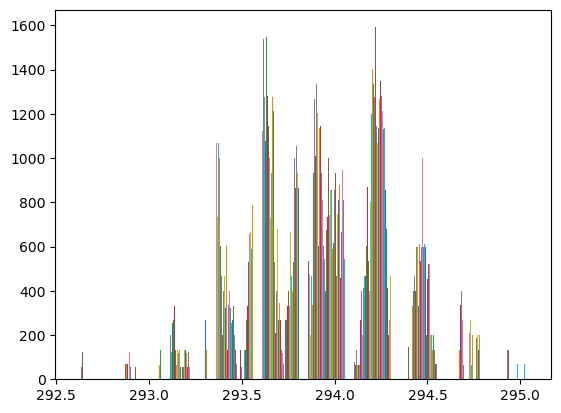

In [7]:
plt.hist(ds_no_standard)

(array([[  0.,   0., 200., ...,   0.,   0.,   0.],
        [  0.,   0., 200., ...,   0.,   0.,   0.],
        [  0.,   0., 200., ...,   0.,   0.,   0.],
        ...,
        [  0., 133., 134., ...,  67.,   0.,   0.],
        [  0., 133., 134., ...,  67.,   0.,   0.],
        [  0., 133., 134., ...,  67.,   0.,   0.]], shape=(3000, 10)),
 array([-0.00464843,  0.08241976,  0.16948796,  0.25655615,  0.34362434,
         0.43069254,  0.51776073,  0.60482892,  0.69189712,  0.77896531,
         0.86603351]),
 <a list of 3000 BarContainer objects>)

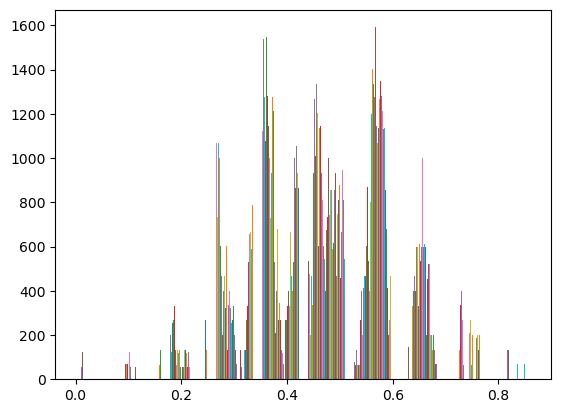

In [8]:
plt.hist(ds_standard)

In [23]:
#BATCH_SIZE = 4

EPOCHS = 50
nTrain = len(os.listdir('/home/jonstar/scratch.gcurbanheat/train_data'))
nVal = round(nTrain*0.2)
#val_indexes = np.arange(nVal)
folds = 5
nBatches = round(nTrain/nVal)
nTrain -= nVal
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    indexes = np.arange(nTrain)
    random.shuffle(indexes)
    #print(len(all_train_tifs))
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    running_loss = 0
    running_val_loss = 0

    for k in range(folds):
        for batch in range(nBatches):
            #print(k, batch)
            # Load new data for each step
            x_batch, y_batch = load_preprocessed_tensor(indexes[batch*nVal:(batch+1)*nVal], 'train', 64)

            if batch == k:
                val_predictions = model(x_batch, training=False)
                val_loss = model.compute_loss(x_batch, val_predictions, y_batch, training=False)
                running_val_loss += val_loss.numpy()
            else:           
                with tf.GradientTape() as tape:
                    # Forward pass
                    #t1 = datetime.datetime.now()
                    predictions = model(x_batch, training=True)
                    #loss = model.compiled_loss(y_batch, predictions)
                    loss = model.compute_loss(x_batch, predictions, y_batch, training=True)
        
                    running_loss += loss.numpy()
                    #print('Model run time', datetime.datetime.now()-t1)
                
                # Compute gradients
                gradients = tape.gradient(loss, model.trainable_variables)
                
                # Update weights
                model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                
                # Update metrics
                #model.compiled_metrics.update_state(y_batch, predictions)
                for metric in METRICS:
                    metric.update_state(y_batch, predictions)

    #for index in val_indexes:
    #x_val, y_val = load_preprocessed_tensor(val_indexes, 'val', 64)
    #val_predictions = model(x_val, training=False)
    #val_loss = model.compute_loss(x_val, val_predictions, y_val, training=False)
    
    train_losses.append(running_loss/folds/nTrain)
    val_losses.append(running_val_loss/folds/nVal)
    #val_losses.append(val_loss.numpy())
    print(f'Average train loss: {running_loss/folds/nTrain}, Average val loss: {running_val_loss/folds/nVal}')
    
    # Reset metrics at the end of each epoch
    model.reset_metrics()

Epoch 1/50
Average train loss: 0.4202460050582886, Average val loss: 1.4472458362579346
Epoch 2/50
Average train loss: 0.6445131301879883, Average val loss: 3333.984375
Epoch 3/50
Average train loss: 0.2888452410697937, Average val loss: 787.8861083984375
Epoch 4/50
Average train loss: 0.29788458347320557, Average val loss: 7492.6923828125
Epoch 5/50
Average train loss: 0.5441882014274597, Average val loss: 3338.704345703125
Epoch 6/50
Average train loss: 0.237473726272583, Average val loss: 617.8317260742188
Epoch 7/50
Average train loss: 0.5982262492179871, Average val loss: 128.9763946533203
Epoch 8/50
Average train loss: 0.5846599340438843, Average val loss: 1.0527987480163574
Epoch 9/50
Average train loss: 0.39330795407295227, Average val loss: 0.21302476525306702
Epoch 10/50
Average train loss: 0.19352030754089355, Average val loss: 1.6227085590362549
Epoch 11/50
Average train loss: 0.4349489212036133, Average val loss: 2.5203254222869873
Epoch 12/50
Average train loss: 0.3932039


KeyboardInterrupt

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__dealloc__'
Traceback (most recent call last):
  File "_zmq.py", line 169, in zmq.backend.cython._zmq._check_rc
Traceback (most recent call last):
  File "_zmq.py", line 169, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt
KeyboardInterrupt: 


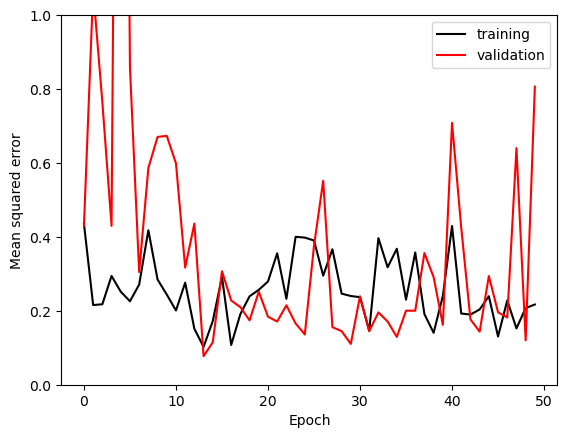

In [19]:
plt.plot(np.array(train_losses), c='k', label='training')
plt.plot(np.array(val_losses), c='r', label='validation')
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.ylim(0,1)
plt.legend()
plt.show()

In [20]:
# saving model
#model.save('Unet_crossVal_31epoch_001Adam.keras')

In [24]:
model = keras.models.load_model('Unet_crossVal_31epoch_001Adam.keras')

In [25]:
colors = plt.cm.jet(np.linspace(0, 1, 18))

In [26]:
def assess_skill(x_test, y_test, test_predictions):
    skill_proportions = np.zeros(18) # 18 is the number of test images

    for img in range(18):
        # Takes the spatial average of all reconstructed GOES temperatures
        inp = ((x_test[img,:,:,2]*var_stds[2]+var_means[2])+(x_test[img,:,:,3]*var_stds[3]+var_means[3])+
              (x_test[img,:,:,4]*var_stds[4]+var_means[4])+(x_test[img,:,:,5]*var_stds[5]+var_means[5]))/4
        # Reconstructs target and prediction Landsat LST
        target = y_test[img]*var_stds[8]+var_means[8]
        pred = test_predictions[img,:,:,0]*var_stds[8]+var_means[8]

        skill = np.abs((target-pred)/(target-inp))
        skill_proportions[img] = np.sum(skill<0.5)/64**2

    return skill_proportions

In [30]:
all_skill_proportions = []
nTest = len(os.listdir('/home/jonstar/scratch.gcurbanheat/test_data'))
test_indexes = np.arange(nTest)

for i in np.arange(0, 3000, 256):
    print(i)
    for j in np.arange(0, 3000, 256):  
        x_test, y_test = load_preprocessed_tensor(test_indexes, 'test', 64, [0,1,2,3,4,5,7,8], i, j)
        test_predictions = model(x_test, training=False)
        all_skill_proportions.append(assess_skill(x_test, y_test, test_predictions))

0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816


In [35]:
np.sum(np.stack(all_skill_proportions) < 0.5)

np.int64(1904)

In [46]:
nTest = len(os.listdir('/home/jonstar/scratch.gcurbanheat/test_data'))
test_indexes = np.arange(nTest)
x_test, y_test = load_preprocessed_tensor(test_indexes, 'test', 64, [0,1,2,3,4,5,7,8])
test_predictions = model(x_test, training=False)
test_loss = model.compute_loss(x_test, test_predictions, y_test, training=False)
print(test_loss.numpy()/nTest)

0.029878804


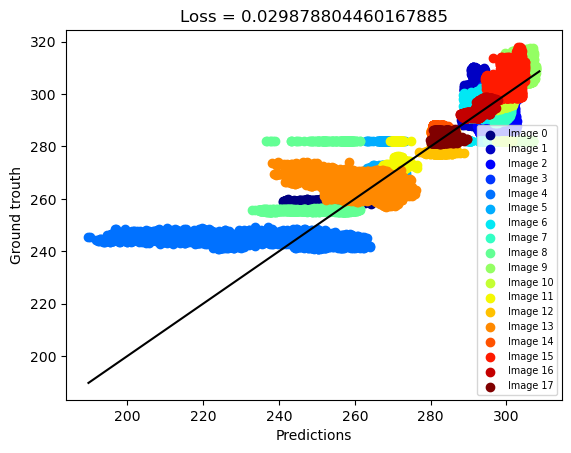

In [47]:
# visualize predictions vs ground truth
lower = np.min(test_predictions*var_stds[8]+var_means[8])
upper = np.max(test_predictions*var_stds[8]+var_means[8])

for dim in range(nTest):
    # Extract points from the tensors
    points1 = test_predictions[dim]*var_stds[8]+var_means[8]
    points2 = y_test[dim]*var_stds[8]+var_means[8]
    #print('points', dim)
    
    # Plot points with corresponding color
    plt.scatter(points1, points2, color=colors[dim], label=f'Image {dim}')
    #print('scatter', dim)
    
plt.plot(np.arange(lower,upper+1), np.arange(lower,upper+1), c='k')
#plt.plot(np.arange(-2, 3), np.arange(-2,3), c='k')
plt.legend(loc='lower right', fontsize='x-small')
plt.xlabel('Predictions')
plt.ylabel('Ground trouth')
plt.title(f'Loss = {test_loss.numpy()/nTest}')
plt.show()

In [39]:
img = 3
inp = ((x_test[img,:,:,2]*var_stds[2]+var_means[2])+(x_test[img,:,:,3]*var_stds[3]+var_means[3])+
      (x_test[img,:,:,4]*var_stds[4]+var_means[4])+(x_test[img,:,:,5]*var_stds[5]+var_means[5]))/4
target = y_test[img]*var_stds[8]+var_means[8]
pred = test_predictions[img,:,:,0]*var_stds[8]+var_means[8]

In [40]:
test_file_list[img]

np.str_('/home/jonstar/scratch.gcurbanheat/temporary_Landsat_data/DMV/Landsat_Sentinel_image_DMV_202207031546.tif')

In [41]:
skill = np.abs((target-pred)/(target-inp))
skill

array([[2.9789221e-01, 2.1509230e-01, 4.0385914e-03, ..., 7.0429422e-02,
        7.0332713e-02, 1.9279315e-01],
       [5.6670602e-02, 5.9758253e-02, 7.9343408e-02, ..., 1.5763021e-01,
        1.9467194e-02, 7.3567726e-02],
       [9.3025245e-02, 6.5306731e-02, 6.2602118e-02, ..., 6.5681495e-04,
        1.3888794e-01, 2.8414458e-01],
       ...,
       [6.4966120e-02, 9.1617726e-02, 4.8089173e-02, ..., 4.8887032e-01,
        3.3834329e-01, 2.0834495e-01],
       [2.9738736e-01, 1.2049666e-01, 1.9903613e-02, ..., 4.1466829e-01,
        3.8170630e-01, 3.5482338e-01],
       [3.1948006e-01, 3.1551439e-02, 9.8433889e-02, ..., 3.9331761e-01,
        6.7461300e-01, 2.7903432e-01]], shape=(64, 64), dtype=float32)

In [42]:
np.sum(skill<0.5)

np.int64(3550)

<Axes: >

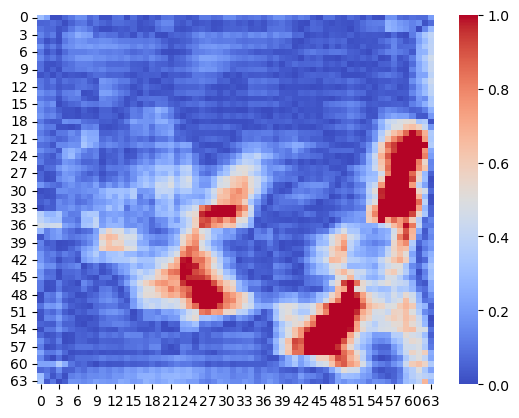

In [43]:
sns.heatmap(skill, vmin=0, vmax=1, cmap='coolwarm')

## XAI

In [81]:
def permutation_feature_importance(model, n_samples=5, n_repeats=3):
    """
    Compute permutation feature importance for a Keras regression model.

    Parameters:
    - model: trained Keras model
    - X: numpy array of shape (n_samples, n_features)
    - y: true target values, shape (n_samples,)
    - n_repeats: number of shuffles per feature

    Returns:
    - Dictionary mapping feature index to importance score
    """
    importances = dict(zip(range(8), np.zeros(8)))
    
    nTest = len(os.listdir('/home/jonstar/scratch.gcurbanheat/test_data'))
    test_indexes = np.arange(nTest)

    for i in range(n_samples):
        x_test, y_test = load_preprocessed_tensor(test_indexes, 'test', 64)
        test_predictions = model(x_test, training=False)
        baseline_test_loss = model.compute_loss(x_test, test_predictions, y_test, training=False).numpy()
    
        for i in range(x_test.shape[-1]):
            scores = []
            for _ in range(n_repeats):
                X_perm = x_test.copy()
                np.random.shuffle(X_perm[:,:,:,i])  # Shuffle only the i-th feature
                test_predictions = model(X_perm, training=False)
                permuted_score = model.compute_loss(X_perm, test_predictions, y_test, training=False).numpy()
                scores.append(permuted_score)
            importances[i] += (np.mean(scores) - baseline_test_loss)/n_samples  # Increase in error

    return importances

In [82]:
imp = permutation_feature_importance(model, n_samples=5)

In [84]:
dict(zip(['single_pol_SAR', 'cross_pol_SAR', 'CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16', 'NDVI', 'NDBI'], imp.values()))

{'single_pol_SAR': np.float64(0.05225470272125676),
 'cross_pol_SAR': np.float64(-0.004571818863041699),
 'CMI_C13': np.float64(0.22818801924586296),
 'CMI_C14': np.float64(0.11137951537966728),
 'CMI_C15': np.float64(-0.9475051611661911),
 'CMI_C16': np.float64(7.276221811771393),
 'NDVI': np.float64(-0.00011973379150731489),
 'NDBI': np.float64(0.0012836695677833632)}

Text(0, 0.5, 'Added Loss')

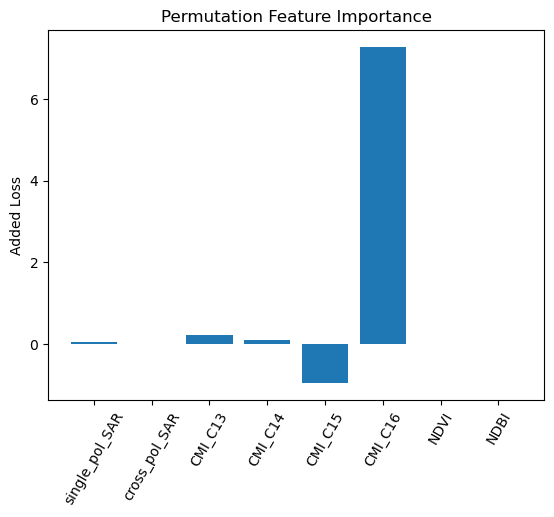

In [88]:
plt.bar(['single_pol_SAR', 'cross_pol_SAR', 'CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16', 'NDVI', 'NDBI'], imp.values())
plt.title('Permutation Feature Importance')
plt.xticks(rotation=60)
plt.ylabel('Added Loss')

In [40]:
x_train, y_train = load_preprocessed_tensor(np.arange(20), 'train', 64, [0,1,2,3,4,5,6,7], 800, 2500)
x_test, y_test = load_preprocessed_tensor(test_indexes, 'test', 64, [0,1,2,3,4,5,6,7], 800, 2500)

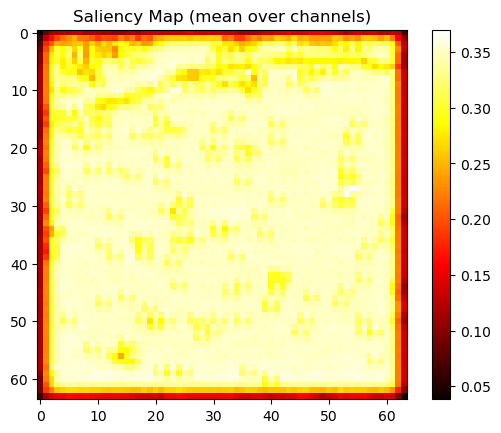

In [47]:
@tf.function
def compute_saliency_map(model, inputs):
    inputs = tf.convert_to_tensor(inputs)
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        preds = model(inputs)
    grads = tape.gradient(preds, inputs)
    return grads

saliency = compute_saliency_map(model, x_test[4:11])
saliency_np = np.abs(saliency.numpy())
plt.imshow(np.mean(saliency_np[6], axis=-1), cmap='hot')
plt.colorbar()
plt.title("Saliency Map (mean over channels)")
plt.show()